In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import h5py
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

In [3]:
PROJECT_PATH = '../'
import sys
sys.path.insert(0, PROJECT_PATH)

In [4]:
from PIML.box.boxWR import BoxWR

In [5]:
b = BoxWR()

In [6]:
W="Blue"; R="M"; Res=5000;step=10;
b.init(W,R, Res,step, onPCA=1)

INFO:root:#536 R=1000.00
INFO:root:snr2nl-SN: [13.477327367293563, 12.711170271971437, 11.199955277459244, 9.743673585808002, 8.31236640095184, 7.23475162784593, 4.272703743007682, 2.147019924552175]


sky_H (5368,)


ValueError: A value in x_new is above the interpolation range.

In [34]:
NL, NL2 = 100, 30
b.estimate_snr(NL), b.estimate_snr(NL2)

(4.9794739520392515, 15.120941710418153)

In [35]:
diff_10k_100, bias_10k_100,bX = b.eval_pca_bias(b.PhyMid, 10000, noise_level=NL)
# diff_10k_30, bias_10k_30 = b.eval_pca_bias(b.PhyMid, 10000, noise_level=NL2)
# diff_1M_100, bias_1M_100 = b.eval_pca_bias(b.PhyMid, 1000000, noise_level=NL)

noise_level 100


In [16]:
diffs = [diff_10k_100, diff_10k_30, diff_1M_100]

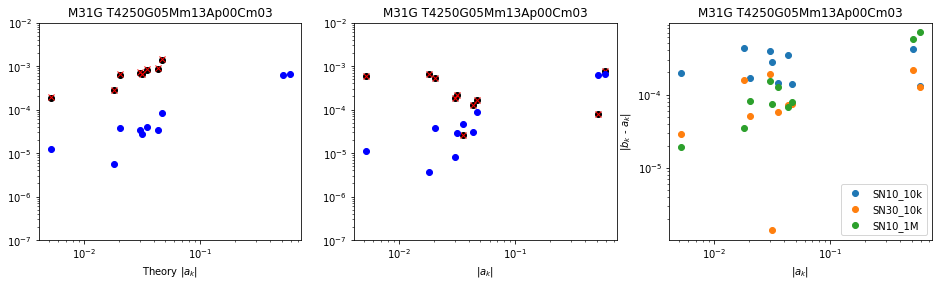

In [36]:
b.plot_bias_evals(diffs, bias_1M_100, bX,pmt=None, diff_labels=["SN10_10k","SN30_10k","SN10_1M"])

In [19]:
b.save_ak()

In [20]:
Dak=b.load_ak()

In [21]:
Dak

{'B': array([-2.57366817e+00,  1.14072671e-01, -3.46437548e-02, -2.68161981e-02,
         4.74299086e-03, -8.11526993e-03, -2.24919024e-03,  1.19151001e-04,
         8.22789128e-04,  7.98247409e-04]),
 'C': array([-1.01586281, -0.12231402,  0.03588269, -0.05906231,  0.01143219,
         0.00808636,  0.01088144,  0.01140936, -0.02440867,  0.0146933 ]),
 'G': array([-1.11782775, -0.00127318,  0.01376378,  0.00945265,  0.00474   ,
         0.01597255, -0.00308587,  0.00340392,  0.00294456, -0.00240108]),
 'M': array([ 0.58659213,  0.51646085,  0.03032693, -0.04683928,  0.01815304,
         0.04347438, -0.03513582, -0.02035979, -0.03146301, -0.00517771]),
 'R': array([-1.89189589e+00, -1.29541130e-02, -3.72722472e-02,  1.01674931e-02,
         1.65208172e-03, -3.71346772e-03, -1.13098203e-02,  1.05191238e-03,
        -6.76999511e-03,  9.55919932e-04]),
 'W': array([-2.01219397e+00,  4.10123220e-02,  3.88338585e-02, -3.76740132e-03,
        -5.74802446e-03, -7.86368317e-04, -2.26835049e-03,

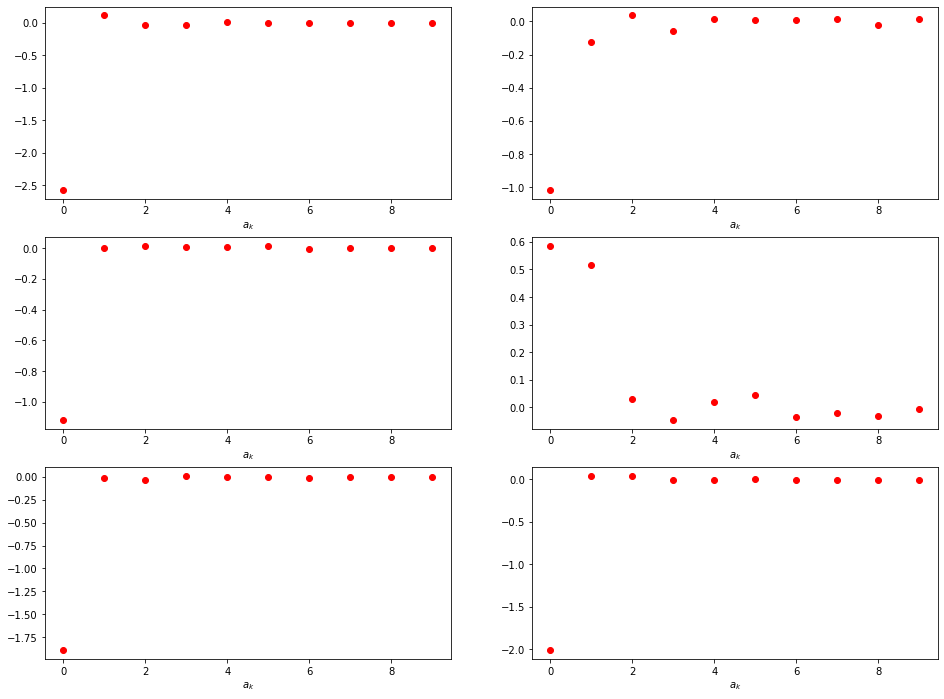

In [27]:
b.plot_Dak(Dak)

In [ ]:
dfpara = bb.IO.read_dfpara()

In [ ]:
a = dfpara.values[:,[1,2]]

In [ ]:
data = np.unique(a, axis=0)

In [ ]:
T, G = data.T

In [ ]:
data[data[:,0]==5000][:,1]

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

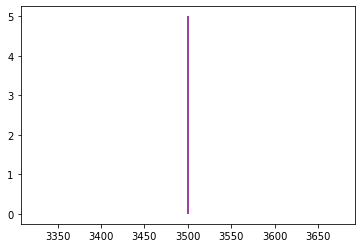

In [ ]:
idx=0
x = bb.UT[idx]
ys = data[data[:,0]==x][:,1]
plt.vlines(x = x, ymin = min(ys), ymax = max(ys),
           colors = 'purple')

(5.0, 0.0)

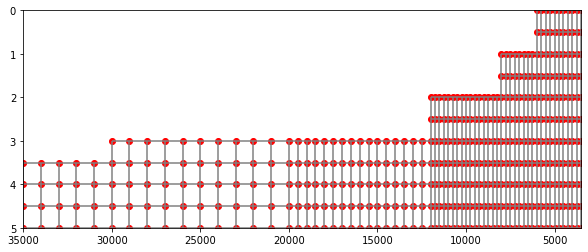

In [150]:
plt.figure(figsize=(10,4))
plt.scatter(*data.T, color="red")
idx=0
for x in bb.UT:
    ys = data[data[:,0]==x][:,1]
    plt.vlines(x = x, ymin = min(ys), ymax = max(ys),
               colors = 'gray')
for y in bb.UG:
    xs = data[data[:,1]==y][:,0]
    plt.hlines(y = y, xmin = min(xs), xmax = max(xs),
               colors = 'gray')
plt.xlim(bb.UT[-1], bb.UT[0])
# plt.xlim(6500, 4200)
# plt.ylim(6,0)
plt.ylim(bb.UG[-1], bb.UG[0])

# plt.xscale("log")

In [90]:
bb.UT

[3500,
 3750,
 4000,
 4250,
 4500,
 4750,
 5000,
 5250,
 5500,
 5750,
 6000,
 6250,
 6500,
 6750,
 7000,
 7250,
 7500,
 7750,
 8000,
 8250,
 8500,
 8750,
 9000,
 9250,
 9500,
 9750,
 10000,
 10250,
 10500,
 10750,
 11000,
 11250,
 11500,
 11750,
 12000,
 12500,
 13000,
 13500,
 14000,
 14500,
 15000,
 15500,
 16000,
 16500,
 17000,
 17500,
 18000,
 18500,
 19000,
 19500,
 20000,
 21000,
 22000,
 23000,
 24000,
 25000,
 26000,
 27000,
 28000,
 29000,
 30000,
 31000,
 32000,
 33000,
 34000,
 35000]

In [81]:
aaa =bb.flux - bb.flux.mean(axis=1)[:,None]

In [82]:
aaa.shape

(7386, 220)

#220 R=1000.00
(2204,) (220,)
Building RBF with gaussan kernel on data shape (7386, 220)


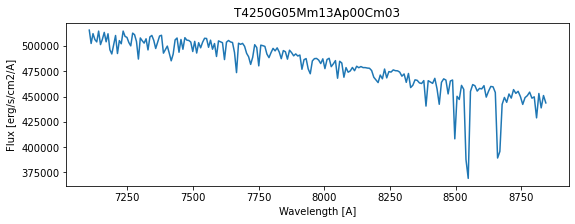

In [59]:
W="RedM"; R="M"; Res=5000;step=10;
bb.init(W,R, Res,step)

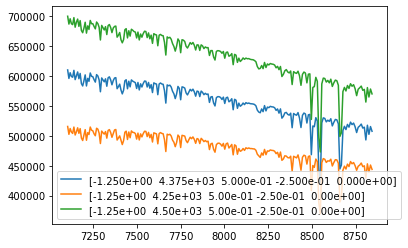

In [60]:
pmt2 = bb.PhyMid + [0.0, 250, 0.0, 0.0, 0.0]
bb.test_rbf(bb.PhyMid, pmt2)

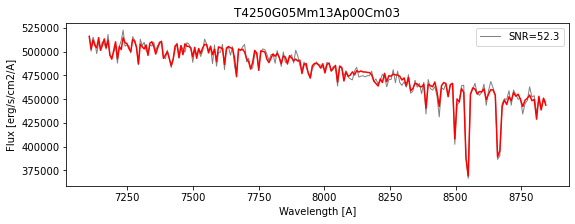

In [61]:
snr =50
obsflux, obsvar = bb.make_obs_from_pmt(bb.PhyMid, snr, plot=1)

Fitting with Template T4250G05Mm13Ap00Cm03
estimate 4253.264480829239


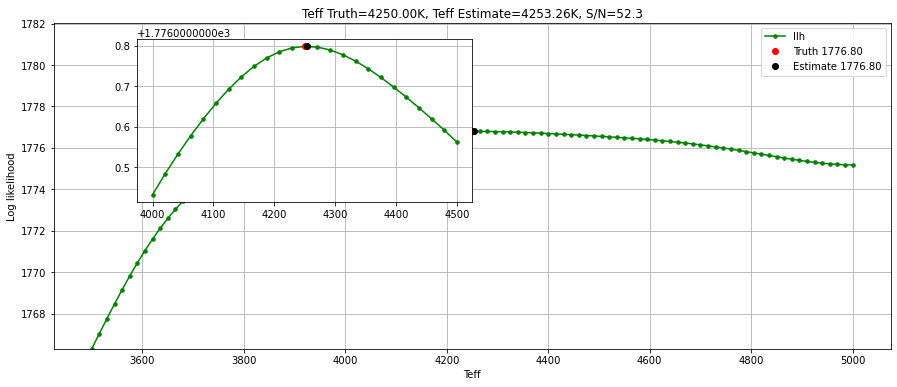

In [62]:
temp_pmt = bb.PhyMid
_=bb.LLH.eval_pmt_on_axis(temp_pmt, temp_pmt[1], obsflux, obsvar, axis="T")

100%|██████████| 10/10 [04:12<00:00, 25.28s/it]


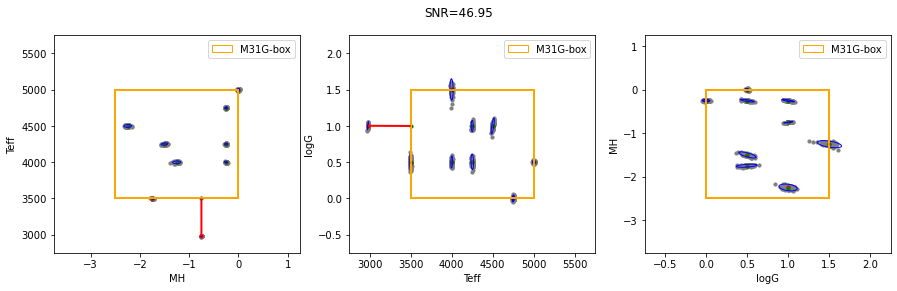

In [64]:
bb.eval_LLH_snr(snr, N_pmt=10, N_obs=100)

In [58]:
 = BoxWR()

#220 R=1000.00
(2204,) (220,)
Building RBF with gaussan kernel on data shape (7386, 220)


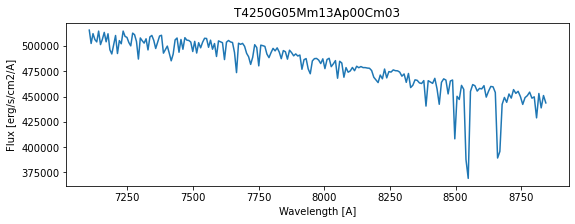

In [59]:
W="RedM"; R="M"; Res=5000;step=10;
BoxWR().init(W,R, Res,step)
BoxWR().eval_LLH_snr(snr, N_pmt=10, N_obs=100)

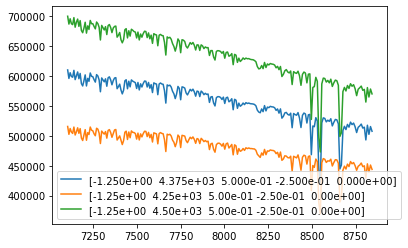

In [60]:
pmt2 = bb.PhyMid + [0.0, 250, 0.0, 0.0, 0.0]
bb.test_rbf(bb.PhyMid, pmt2)

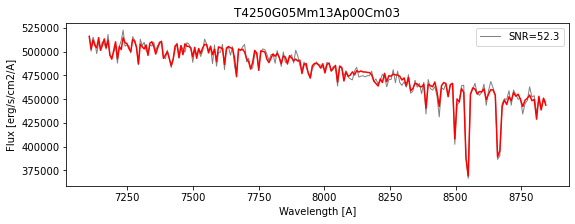

In [61]:
snr =50
obsflux, obsvar = bb.make_obs_from_pmt(bb.PhyMid, snr, plot=1)

Fitting with Template T4250G05Mm13Ap00Cm03
estimate 4253.264480829239


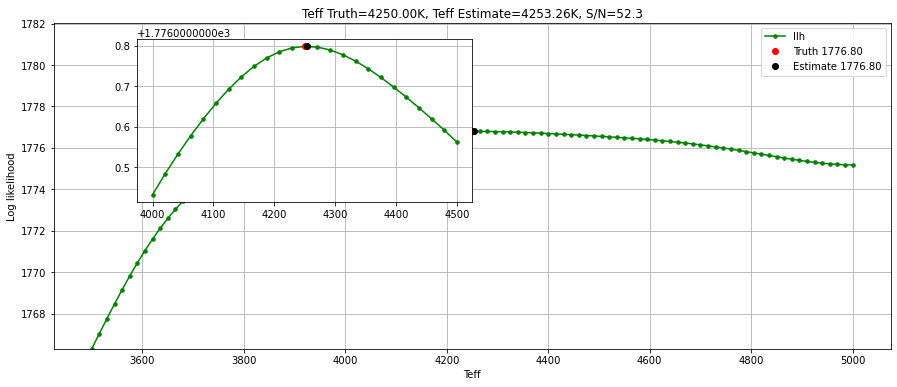

In [62]:
temp_pmt = bb.PhyMid
_=bb.LLH.eval_pmt_on_axis(temp_pmt, temp_pmt[1], obsflux, obsvar, axis="T")

100%|██████████| 10/10 [02:16<00:00, 13.65s/it]


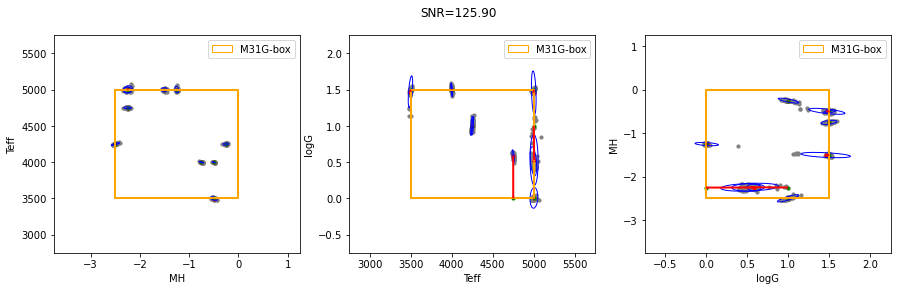

In [65]:
snr=50
bb.eval_LLH_snr(snr, N_pmt=10, N_obs=50)

100%|██████████| 10/10 [02:20<00:00, 14.06s/it]


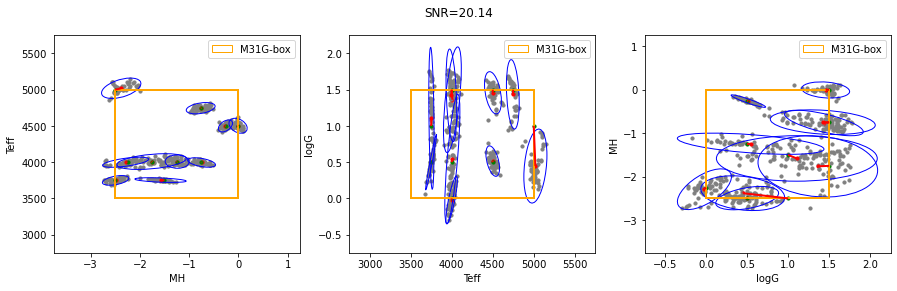

In [66]:
snr=20
bb.eval_LLH_snr(snr, N_pmt=10, N_obs=50)

#220 R=1000.00
(2204,) (220,)
Building RBF with gaussan kernel on data shape (6886, 220)


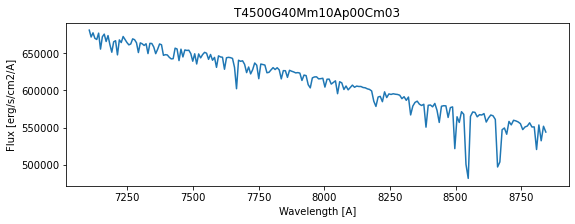

In [67]:
R="C"; 
W="RedM"; Res=5000;step=10;
bC = BoxWR()
bC.init(W,R, Res,step)

100%|██████████| 10/10 [02:08<00:00, 12.83s/it]


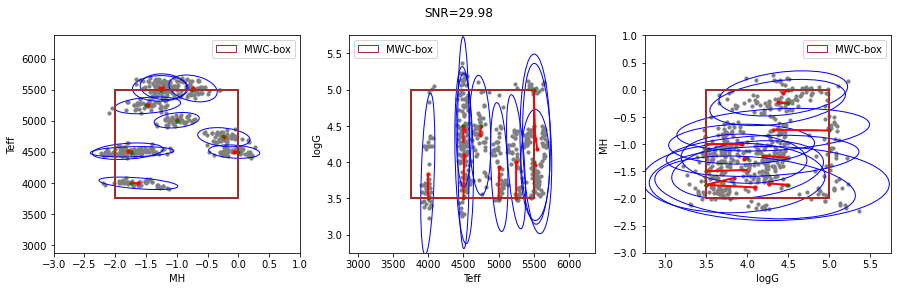

In [68]:
snr=20
bC.eval_LLH_snr(snr, N_pmt=10, N_obs=50)

100%|██████████| 10/10 [01:57<00:00, 11.75s/it]


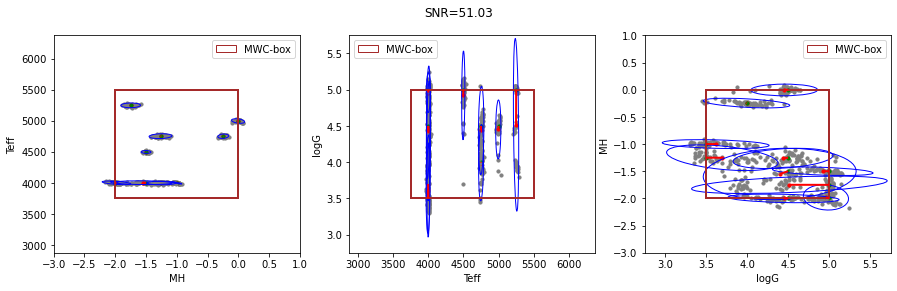

In [73]:
snr=50
bC.eval_LLH_snr(snr, N_pmt=10, N_obs=50)

#220 R=1000.00
(2204,) (220,)
Building RBF with gaussan kernel on data shape (5880, 220)


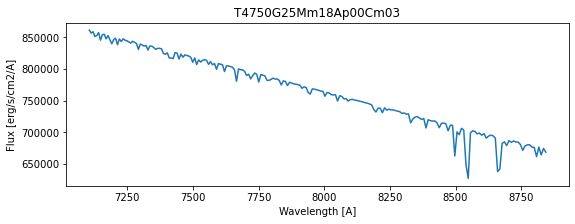

In [70]:
R="G"; 
W="RedM"; Res=5000;step=10;
bG = BoxWR()
bG.init(W,R, Res,step)

100%|██████████| 10/10 [01:48<00:00, 10.81s/it]


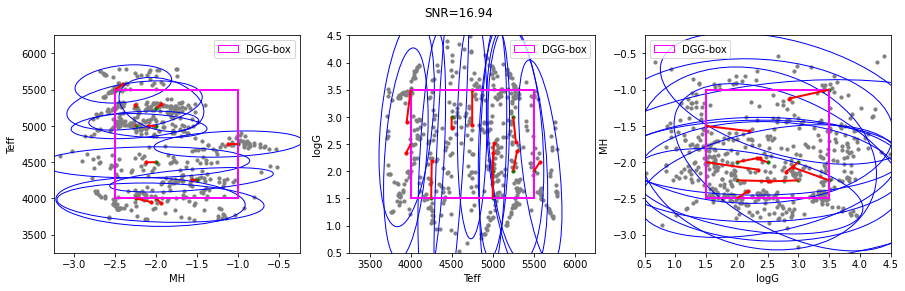

In [71]:
snr=20
bG.eval_LLH_snr(snr, N_pmt=10, N_obs=50)

100%|██████████| 10/10 [01:45<00:00, 10.58s/it]


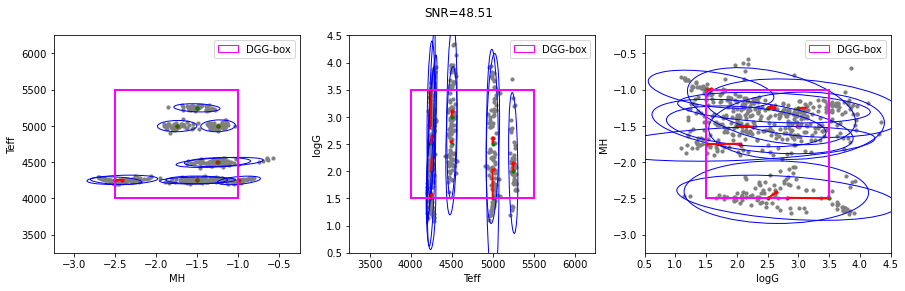

In [72]:
snr=50
bG.eval_LLH_snr(snr, N_pmt=10, N_obs=50)